<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [5]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [1]:
import pandas as pd


Import matplotlib


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [3]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [4]:
 df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [4]:
print("Number of duplicated rows in dataset:",df.duplicated().sum())
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.head()) 


Number of duplicated rows in dataset: 20
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open-source projec

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [8]:
from collections import Counter
dupes = df[df.duplicated(subset=["MainBranch", "Employment", "RemoteWork"], keep=False)]

grouped = dupes.groupby(["MainBranch", "Employment", "RemoteWork"])

columns_to_check = df.columns.difference(["MainBranch", "Employment", "RemoteWork"])

identical_counts = Counter()

for _, group in grouped:
    for col in columns_to_check:
        if group[col].nunique(dropna=False) == 1:
            identical_counts[col] += 1

print("Columns that are frequently identical across duplicate groups:")
for col, count in identical_counts.most_common():
    print(f"{col}: identical in {count} duplicate groups")


Columns that are frequently identical across duplicate groups:
Check: identical in 319 duplicate groups
AINextMuch less integrated: identical in 213 duplicate groups
ConvertedCompYearly: identical in 165 duplicate groups
AINextLess integrated: identical in 161 duplicate groups
BuildvsBuy: identical in 161 duplicate groups
PurchaseInfluence: identical in 156 duplicate groups
CompTotal: identical in 152 duplicate groups
OrgSize: identical in 151 duplicate groups
Currency: identical in 146 duplicate groups
YearsCodePro: identical in 144 duplicate groups
BuyNewTool: identical in 143 duplicate groups
TechEndorse: identical in 142 duplicate groups
Frequency_3: identical in 135 duplicate groups
TBranch: identical in 134 duplicate groups
ProfessionalTech: identical in 134 duplicate groups
ProfessionalCloud: identical in 133 duplicate groups
ICorPM: identical in 133 duplicate groups
Knowledge_8: identical in 132 duplicate groups
Knowledge_5: identical in 131 duplicate groups
Industry: identical

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


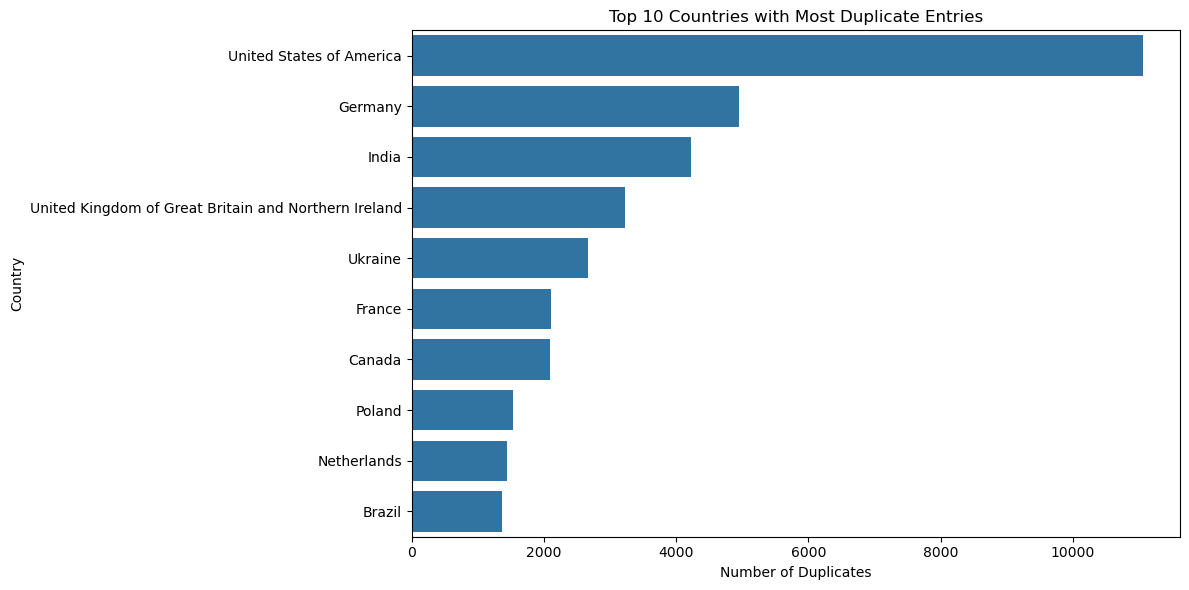

In [25]:

plt.figure(figsize=(12, 6))
sns.countplot(data=dupes, y="Country", order=dupes["Country"].value_counts().index[:10])
plt.title("Top 10 Countries with Most Duplicate Entries")
plt.xlabel("Number of Duplicates")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

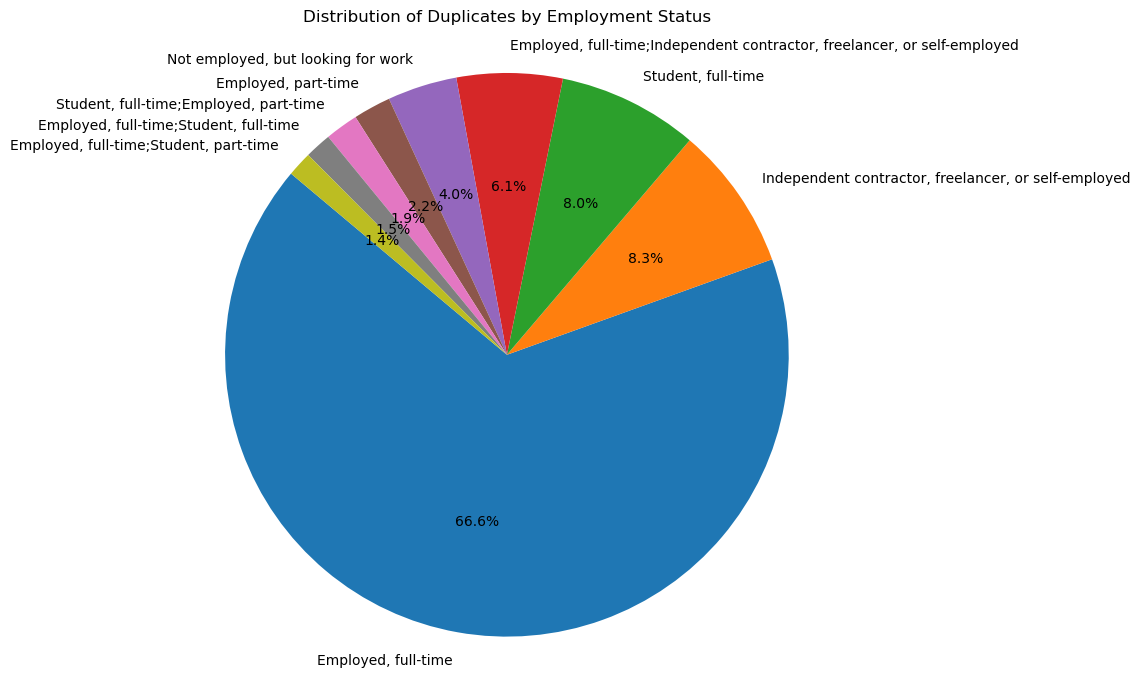

In [24]:
employment_counts = dupes["Employment"].value_counts().head(9)
plt.figure(figsize=(8, 8))
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Duplicates by Employment Status\n")
plt.axis('equal')
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [22]:
critical_cols = ["MainBranch", "Employment", "RemoteWork", "Country"]
df_cleaned = df.drop_duplicates(subset=critical_cols, keep='first')

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


##  Process of Identifying and Removing Duplicates

In real-world survey data its common to encounter **partially duplicated entries**  where participants may have submitted the survey multiple times with minor differences (such as missing answers or slight variations in non critical fields). Therefore  relying solely on **complete row duplication** is not always effective in identifying duplicates.

To clean the dataset effectively:

- We first examined the dataset using df.duplicated() to check for fully identical rows.
- Then, we analyzed duplicates based on a **subset of important columns** that are more likely to define a unique respondent.
- This helps retain only meaningful and unique entries while reducing noise in the data.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


We chose the following columns as **critical identifiers** to define uniqueness:

- **MainBranch** – Represents the respondents primary role in the tech field.
- **Employment** – Indicates employment type (e.g., full-time, student) which is stable.
- **RemoteWork** – Denotes whether the respondent works remotely.
- **Country** – Represents the geographic location of the respondent.

These columns are relatively **stable and unique per respondent** and if multiple rows share the same values here they likely represent the same person. Variations in other columns (like age, salary, etc.) might be due to incomplete answers or duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
